### Importing Libraries

In [1]:
import os
from IPython import display
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Reshape, Flatten, Conv2D, Conv2DTranspose, MaxPooling2D, LeakyReLU, BatchNormalization, Dropout
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array

2024-04-25 12:10:26.806631: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-25 12:10:26.999990: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-25 12:10:27.786269: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/student/anaconda3/envs/tensorflow/lib/python3.10/site-packages/cv2/../../lib64:/h

### Data Processing

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


2024-04-25 12:10:28.849287: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2d:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-25 12:10:28.856179: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2d:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-25 12:10:28.856244: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2d:00.0/numa_node
Your kernel may have been built without NUMA support.


In [3]:
data_dir = "Dataset/4"

img_width, img_height = 512, 512 # 224 for DCGAN
batch_size = 32

# Load all images from the folder
def load_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        img = load_img(os.path.join(folder_path, filename), target_size=(img_width, img_height))
        img_array = img_to_array(img)
        img_tensor = tf.convert_to_tensor(img_array)
        images.append(img_tensor)
    return np.array(images)

# Load images from the folder
train = load_images_from_folder(data_dir)

2024-04-25 12:10:28.898323: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-25 12:10:28.901629: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2d:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-25 12:10:28.901766: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2d:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-25 12:10:28.901846: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0

In [4]:
train

array([[[[125., 125., 125.],
         [125., 125., 125.],
         [127., 127., 127.],
         ...,
         [ 47.,  47.,  47.],
         [ 44.,  44.,  44.],
         [ 44.,  44.,  44.]],

        [[125., 125., 125.],
         [125., 125., 125.],
         [127., 127., 127.],
         ...,
         [ 47.,  47.,  47.],
         [ 44.,  44.,  44.],
         [ 44.,  44.,  44.]],

        [[124., 124., 124.],
         [124., 124., 124.],
         [126., 126., 126.],
         ...,
         [ 47.,  47.,  47.],
         [ 43.,  43.,  43.],
         [ 43.,  43.,  43.]],

        ...,

        [[ 95.,  95.,  95.],
         [ 95.,  95.,  95.],
         [ 95.,  95.,  95.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        [[ 96.,  96.,  96.],
         [ 96.,  96.,  96.],
         [ 96.,  96.,  96.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        [[ 96.,  96.,  96.],
       

In [5]:
train = (train - 127.5) / 127.5  # Normalize the images to [-1, 1]

In [6]:
train

array([[[[-0.01960784, -0.01960784, -0.01960784],
         [-0.01960784, -0.01960784, -0.01960784],
         [-0.00392157, -0.00392157, -0.00392157],
         ...,
         [-0.6313726 , -0.6313726 , -0.6313726 ],
         [-0.654902  , -0.654902  , -0.654902  ],
         [-0.654902  , -0.654902  , -0.654902  ]],

        [[-0.01960784, -0.01960784, -0.01960784],
         [-0.01960784, -0.01960784, -0.01960784],
         [-0.00392157, -0.00392157, -0.00392157],
         ...,
         [-0.6313726 , -0.6313726 , -0.6313726 ],
         [-0.654902  , -0.654902  , -0.654902  ],
         [-0.654902  , -0.654902  , -0.654902  ]],

        [[-0.02745098, -0.02745098, -0.02745098],
         [-0.02745098, -0.02745098, -0.02745098],
         [-0.01176471, -0.01176471, -0.01176471],
         ...,
         [-0.6313726 , -0.6313726 , -0.6313726 ],
         [-0.6627451 , -0.6627451 , -0.6627451 ],
         [-0.6627451 , -0.6627451 , -0.6627451 ]],

        ...,

        [[-0.25490198, -0.25490198, -0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


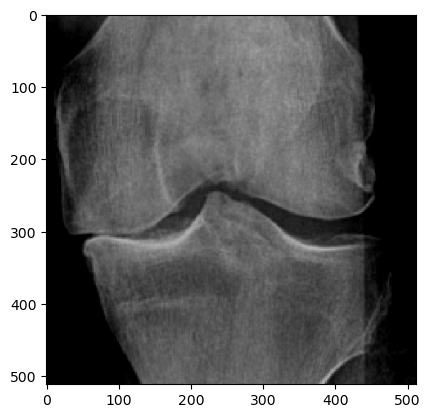

In [7]:
plt.imshow(train[2])

In [8]:
train.shape

(536, 512, 512, 3)

GAN

In [9]:
BUFFER_SIZE = 64000
BATCH_SIZE = 32
batch_size = BATCH_SIZE
EPOCHS = 60
latent_dim = 128
input_size = [256*2, 256*2, 3]
image_size = (256*2, 256*2)

In [12]:
def gen_model():
    model = Sequential([
        Input(shape=(latent_dim,)),
        Dense(8 * 8 * 256),
        Reshape((8, 8, 256)),
        Conv2DTranspose(28, kernel_size=4, strides=2, padding='same'),
        LeakyReLU(alpha=0.1),
        Conv2DTranspose(28, kernel_size=4, strides=2, padding='same'),
        LeakyReLU(alpha=0.1),
        Conv2DTranspose(28, kernel_size=4, strides=2, padding='same'),
        LeakyReLU(alpha=0.1),
        Conv2DTranspose(28, kernel_size=4, strides=2, padding='same'),
        LeakyReLU(alpha=0.1),
        Conv2DTranspose(28, kernel_size=4, strides=2, padding='same'),
        LeakyReLU(alpha=0.1),
        Conv2DTranspose(28, kernel_size=4, strides=2, padding='same'),
        LeakyReLU(alpha=0.1),
        Conv2D(3, kernel_size=4, padding='same', activation='sigmoid')
    ],
        name="generator"
    )
    return model

def disc_model():
    model = Sequential([
        Input(shape=input_size),
        Conv2D(28, kernel_size=4, strides=2, padding='same'),
        BatchNormalization(),
        LeakyReLU(alpha=0.1),
        MaxPooling2D(strides=2),
        Conv2D(28, kernel_size=4, strides=2, padding='same'),
        BatchNormalization(),
        LeakyReLU(alpha=0.1),
        MaxPooling2D(strides=2),
        Conv2D(28, kernel_size=4, strides=2, padding='same'),
        BatchNormalization(),
        LeakyReLU(alpha=0.1),
        MaxPooling2D(strides=2),
        Conv2D(28, kernel_size=4, strides=2, padding='same'),
        BatchNormalization(),
        LeakyReLU(alpha=0.1),
        MaxPooling2D(strides=2),

        Flatten(),
        Dense(28),
        LeakyReLU(alpha=0.1),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ],
        name="discriminator"
    )
    return model

generator = gen_model()
generator.summary()

discriminator = disc_model()
discriminator.summary()

class Gan(Model):
    def __init__(self, discriminator, generator, latent_dim):
        super().__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim
    
    def compile(self, disc_opt, gen_opt, loss_function):
        super().compile()
        self.disc_opt = disc_opt
        self.gen_opt = gen_opt
        self.loss_function = loss_function
        self.disc_loss_metric = tf.keras.metrics.Mean(name="disc_loss")
        self.gen_loss_metric = tf.keras.metrics.Mean(name="gen_loss")
        
    @property
    def metrics(self):
        return [self.disc_loss_metric, self.gen_loss_metric]
    
    def train_step(self, data):
        real_images, real_labels = data  # Accept labels separately

        # Generate random latent vectors
        batch_size = tf.shape(real_images)[0]
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))

        # Generate fake images
        generated_images = self.generator(random_latent_vectors)

        # Combine real and fake images
        combined_images = tf.concat([generated_images, real_images], axis=0)

        # Concatenate the real and fake labels
        labels = tf.concat([tf.ones((batch_size, 1)), tf.zeros((batch_size, 1))], axis=0)
        labels += 0.05 * tf.random.uniform(tf.shape(labels))

        # Discriminator training
        with tf.GradientTape() as tape:
            predictions = self.discriminator(combined_images)
            disc_loss = self.loss_function(labels, predictions)

        grads = tape.gradient(disc_loss, self.discriminator.trainable_weights)
        self.disc_opt.apply_gradients(zip(grads, self.discriminator.trainable_weights))

        # Generator training
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))
        misleading_labels = tf.zeros((batch_size, 1))

        with tf.GradientTape() as tape:
            predictions = self.discriminator(self.generator(random_latent_vectors))
            gen_loss = self.loss_function(misleading_labels, predictions)

        grads = tape.gradient(gen_loss, self.generator.trainable_weights)
        self.gen_opt.apply_gradients(zip(grads, self.generator.trainable_weights))

        # Update loss metrics
        self.disc_loss_metric.update_state(disc_loss)
        self.gen_loss_metric.update_state(gen_loss)

        return {
            "disc_loss": self.disc_loss_metric.result(),
            "gen_loss": self.gen_loss_metric.result()
        }
    
def gen_images(generator, current_epoch, num_of_samples=2):
    noise = tf.random.normal([num_of_samples, latent_dim], dtype=tf.float32)
    generated_images = generator(noise, training=False)
    
    figure = plt.figure(figsize=(20, 20))
    for i in range(generated_images.shape[0]):
        plt.subplot(2, 2, i + 1)
        plt.imshow(generated_images[i, :, :, 0], cmap='gray')
        plt.title(f"After epoch {current_epoch}")
        plt.axis('off')

    plt.savefig(f'After_epochs_{current_epoch:04d}.png')
    plt.show()

class Gan_Callback(tf.keras.callbacks.Callback):
    def __init__(self, num_images=2, latent_dim=128):
        self.num_images = num_images
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        latent_vectors = tf.random.normal(shape=(self.num_images, self.latent_dim))
        generated_images = self.model.generator(latent_vectors)
        generated_images *= 255
        generated_images = generated_images.numpy()  # Removed redundant line

        figure = plt.figure(figsize=(10, 10))
        for i in range(generated_images.shape[0]):
            plt.subplot(2, 2, i + 1)
            plt.imshow(generated_images[i, :, :, 0], cmap='gray')
            plt.title(f"After epoch {epoch + 1}")
            plt.axis('off')

        plt.savefig('After_epochs_{:04d}.png'.format(epoch + 1))
        plt.show()

        if epoch % 10 == 0:
            self.model.generator.save('/kaggle/working/gen.h5')
            self.model.discriminator.save('/kaggle/working/disc.h5')

gan = Gan(discriminator=discriminator, generator=generator, latent_dim=latent_dim)
gan.compile(
disc_opt=tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5), 
gen_opt=tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5),
# Parallel gpu computing won't work unless  we pass reduction=tf.keras.losses.Reduction.NONE as a parameter too.
loss_function=tf.keras.losses.BinaryCrossentropy(from_logits=True, reduction=tf.keras.losses.Reduction.NONE),
)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 16384)             2113536   
                                                                 
 reshape_1 (Reshape)         (None, 8, 8, 256)         0         
                                                                 
 conv2d_transpose_6 (Conv2DT  (None, 16, 16, 28)       114716    
 ranspose)                                                       
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 16, 16, 28)        0         
                                                                 
 conv2d_transpose_7 (Conv2DT  (None, 32, 32, 28)       12572     
 ranspose)                                                       
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 32, 32, 28)        0 

NameError: name 'Dropout' is not defined

In [ ]:
#actual traing begins here
history = gan.fit(
    image_loader(dataset_pneumonia), 
    epochs=EPOCHS,
    steps_per_epoch=len(dataset_pneumonia),  
    callbacks=[Gan_Callback(num_images=4, latent_dim=latent_dim)]
)

### DCGAN - Tensorflow

In [9]:
# # Generator
# def build_generator(latent_dim):
#     input_noise = Input(shape=(latent_dim,))
#     x = Dense(7*7*256)(input_noise)
#     x = Reshape((7, 7, 256))(x)
#     x = Conv2DTranspose(128, kernel_size=5, strides=4, padding='same')(x)  # Adjust the strides to upscale to 28x28
#     x = BatchNormalization()(x)
#     x = LeakyReLU(alpha=0.01)(x)
#     x = Conv2DTranspose(64, kernel_size=5, strides=4, padding='same')(x)  # Adjust the strides to upscale to 112x112
#     x = BatchNormalization()(x)
#     x = LeakyReLU(alpha=0.01)(x)
#     x = Conv2DTranspose(1, kernel_size=5, strides=2, padding='same', activation='tanh')(x)  # Adjust the strides to upscale to 224x224
#     generator = Model(input_noise, x)
#     return generator

# # Discriminator
# def build_discriminator(input_shape):
#     input_image = Input(shape=input_shape)
#     x = Conv2D(64, kernel_size=5, strides=2, padding='same')(input_image)
#     x = LeakyReLU(alpha=0.01)(x)
#     x = Conv2D(128, kernel_size=5, strides=2, padding='same')(x)
#     x = LeakyReLU(alpha=0.01)(x)
#     x = Flatten()(x)
#     x = Dense(1, activation='sigmoid')(x)
#     discriminator = Model(input_image, x)
#     return discriminator

# # Combined model
# def build_dcgan(generator, discriminator):
#     discriminator.trainable = False
#     input_noise = Input(shape=(latent_dim,))
#     generated_image = generator(input_noise)
#     validity = discriminator(generated_image)
#     dcgan = Model(input_noise, validity)
#     return dcgan

# # Define the input shape and latent dimension
# input_shape = (224, 224, 1)
# latent_dim = 100

# # Build the generator, discriminator, and DCGAN models
# generator = build_generator(latent_dim)
# discriminator = build_discriminator(input_shape)
# dcgan = build_dcgan(generator, discriminator)

# # Compile the discriminator and DCGAN models
# discriminator.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5))
# dcgan.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5))

In [10]:
from keras.layers import Input, Dense, Reshape, Conv2D, Conv2DTranspose, Flatten, BatchNormalization, LeakyReLU
from keras.models import Model
from keras.optimizers import Adam

# Generator
def build_generator(latent_dim):
    input_noise = Input(shape=(latent_dim,))
    x = Dense(7*7*256)(input_noise)
    x = Reshape((7, 7, 256))(x)
    x = Conv2DTranspose(128, kernel_size=5, strides=4, padding='same')(x)  # Adjust the strides to upscale to 28x28
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.01)(x)
    x = Conv2DTranspose(64, kernel_size=5, strides=4, padding='same')(x)  # Adjust the strides to upscale to 112x112
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.01)(x)
    x = Conv2DTranspose(3, kernel_size=5, strides=2, padding='same', activation='tanh')(x)  # Adjust the strides to upscale to 224x224 and output 3 channels
    generator = Model(input_noise, x)
    return generator

# Discriminator
def build_discriminator(input_shape):
    input_image = Input(shape=input_shape)
    x = Conv2D(64, kernel_size=5, strides=2, padding='same')(input_image)
    x = LeakyReLU(alpha=0.01)(x)
    x = Conv2D(128, kernel_size=5, strides=2, padding='same')(x)
    x = LeakyReLU(alpha=0.01)(x)
    x = Flatten()(x)
    x = Dense(1, activation='sigmoid')(x)
    discriminator = Model(input_image, x)
    return discriminator

# Combined model
def build_dcgan(generator, discriminator):
    discriminator.trainable = False
    input_noise = Input(shape=(latent_dim,))
    generated_image = generator(input_noise)
    validity = discriminator(generated_image)
    dcgan = Model(input_noise, validity)
    return dcgan

# Define the input shape and latent dimension
input_shape = (224, 224, 3)  # Changed to 3 channels
latent_dim = 100

# Build the generator, discriminator, and DCGAN models
generator = build_generator(latent_dim)
discriminator = build_discriminator(input_shape)
dcgan = build_dcgan(generator, discriminator)

# Compile the discriminator and DCGAN models
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5))
dcgan.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5))


In [11]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(224, 224))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

In [16]:
epochs = 50
batch_size = 64

seed = tf.random.normal([16, 100])

# Train the DCGAN model
for epoch in range(epochs):
    for batch in range(train.shape[0] // batch_size):
        # Train the discriminator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        fake_images = generator.predict(noise)
        real_images = train[np.random.randint(0, train.shape[0], batch_size)]
        
        discriminator_loss_real = discriminator.train_on_batch(real_images, np.ones(batch_size))
        discriminator_loss_fake = discriminator.train_on_batch(fake_images, np.zeros(batch_size))
        discriminator_loss = 0.5 * np.add(discriminator_loss_real, discriminator_loss_fake)
        
        # Train the generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        generator_loss = dcgan.train_on_batch(noise, np.ones(batch_size))
    
    # Print the losses
    print(f"Epoch {epoch+1}/{epochs} - Discriminator Loss: {discriminator_loss} - Generator Loss: {generator_loss}")

2/2 [==============================] - 0s 202ms/step
Epoch 1/50 - Discriminator Loss: 1.4941549897193909 - Generator Loss: 0.0015208791010081768
2/2 [==============================] - 0s 199ms/step
Epoch 2/50 - Discriminator Loss: 1.5615603923797607 - Generator Loss: 0.0014268035301938653
2/2 [==============================] - 0s 203ms/step
Epoch 3/50 - Discriminator Loss: 1.6146489679813385 - Generator Loss: 0.001383577473461628
2/2 [==============================] - 0s 206ms/step
Epoch 4/50 - Discriminator Loss: 1.6894338726997375 - Generator Loss: 0.0013293165247887373
2/2 [==============================] - 0s 198ms/step
Epoch 5/50 - Discriminator Loss: 1.741690218448639 - Generator Loss: 0.0013100445503368974
2/2 [==============================] - 0s 214ms/step
Epoch 6/50 - Discriminator Loss: 1.8307473361492157 - Generator Loss: 0.0012697991915047169
2/2 [==============================] - 0s 195ms/step
Epoch 7/50 - Discriminator Loss: 1.8960366249084473 - Generator Loss: 0.0012056

In [ ]:
generate_and_save_images(generator, epochs, seed)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random noise
num_samples =  16  # Number of images to generate
noise = np.random.normal(0, 1, (num_samples, latent_dim))  # latent_dim should match the dimensionality of your generator's input

# Generate images using the generator
generated_images = generator.predict(noise)

# Visualize the generated images
fig, axs = plt.subplots(4, 4)
fig.suptitle('Generated Images')
count = 0
for i in range(4):
    for j in range(4):
        axs[i, j].imshow(generated_images[count, :, :, 0], cmap='gray')  # Assuming grayscale images
        axs[i, j].axis('off')
        count += 1
plt.show()


In [9]:
# generator.save("Saved Models/Generator")
# discriminator.save("Saved Models/Discriminator")
# dcgan.save("Saved Models/DCGAN")

### DCGAN - PyTorch

In [5]:
import torch
torch.cuda.current_device()
# torch.cuda.get_device_name(device_ID)

0

In [9]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# import torchvision
# from torchvision import datasets, transforms
# from torch.utils.data import DataLoader
# import matplotlib.pyplot as plt

# # Device configuration
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# # Define the Generator network
# class Generator(nn.Module):
#     def __init__(self):
#         super(Generator, self).__init__()
#         self.main = nn.Sequential(
#             # input is Z, going into a convolution
#             nn.ConvTranspose2d(100, 64 * 8, 4, 1, 0, bias=False),
#             nn.BatchNorm2d(64 * 8),
#             nn.ReLU(True),
#             # state size. (64*8) x 4 x 4
#             nn.ConvTranspose2d(64 * 8, 64 * 4, 4, 2, 1, bias=False),
#             nn.BatchNorm2d(64 * 4),
#             nn.ReLU(True),
#             # state size. (64*4) x 8 x 8
#             nn.ConvTranspose2d(64 * 4, 64 * 2, 4, 2, 1, bias=False),
#             nn.BatchNorm2d(64 * 2),
#             nn.ReLU(True),
#             # state size. (64*2) x 16 x 16
#             nn.ConvTranspose2d(64 * 2,    1, 4, 2, 1, bias=False),
#             nn.Tanh()
#             # state size. 1 x 32 x 32
#         )

#     def forward(self, input):
#         return self.main(input)

# # Define the Discriminator network
# class Discriminator(nn.Module):
#     def __init__(self):
#         super(Discriminator, self).__init__()
#         self.main = nn.Sequential(
#             # input is (nc) x 32 x 32
#             nn.Conv2d(1, 64, 4, 2, 1, bias=False),
#             nn.LeakyReLU(0.2, inplace=True),
#             # state size. (64) x 16 x 16
#             nn.Conv2d(64, 64 * 2, 4, 2, 1, bias=False),
#             nn.BatchNorm2d(64 * 2),
#             nn.LeakyReLU(0.2, inplace=True),
#             # state size. (64*2) x 8 x 8
#             nn.Conv2d(64 * 2, 64 * 4, 4, 2, 1, bias=False),
#             nn.BatchNorm2d(64 * 4),
#             nn.LeakyReLU(0.2, inplace=True),
#             # state size. (64*4) x 4 x 4
#             nn.Conv2d(64 * 4, 1, 4, 1, 0, bias=False),
#             nn.Sigmoid()
#         )

#     def forward(self, input):
#         return self.main(input)

# # Create the Generator and Discriminator networks
# netG = Generator().to(device)
# netD = Discriminator().to(device)

# # Setup Adam optimizers for both G and D
# optimizerD = optim.Adam(netD.parameters(), lr=0.0002, betas=(0.5, 0.999))
# optimizerG = optim.Adam(netG.parameters(), lr=0.0002, betas=(0.5, 0.999))

# # Configure data loader
# transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
# dataset = datasets.ImageFolder(root='Dataset', transform=transform)
# dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

# # Define real and fake labels
# real_label = 1.0
# fake_label = 0.0

# # Define the loss function
# criterion = nn.BCELoss()

# # Training Loop
# epochs = 10
# for epoch in range(epochs):
#     for i, data in enumerate(dataloader, 0):
#         ############################
#         # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
#         ###########################
#         ## Train with all-real batch
#         netD.zero_grad()
#         # Format batch
#         real_cpu = data[0].to(device)
#         b_size = real_cpu.size(0)
#         label = torch.full((b_size, 1, 1, 1), real_label, device=device)

#         # Forward pass real batch through D
#         output = netD(real_cpu)
#         # Calculate loss on all-real batch
#         errD_real = criterion(output, label)
#         # Calculate gradients for D in backward pass
#         errD_real.backward()
#         D_x = output.mean().item()

#         ## Train with all-fake batch
#         # Generate batch of latent vectors
#         noise = torch.randn(b_size, 100, 1, 1, device=device)
#         # Generate fake image batch with G
#         fake = netG(noise)
#         label.fill_(fake_label)
#         # Classify all fake batch with D
#         output = netD(fake.detach())
#         # Calculate D's loss on the all-fake batch
#         errD_fake = criterion(output, label)
#         # Calculate the gradients for this batch
#         errD_fake.backward()
#         D_G_z1 = output.mean().item()
#         # Add the gradients from the all-real and all-fake batches
#         errD = errD_real + errD_fake
#         # Update D
#         optimizerD.step()

#         ############################
#         # (2) Update G network: maximize log(D(G(z)))
#         ###########################
#         netG.zero_grad()
#         label.fill_(real_label)  # fake labels are real for generator cost
#         # Since we just updated D, perform another forward pass of all-fake batch through D
#         output = netD(fake)
#         # Calculate G's loss based on this output
#         errG = criterion(output, label)
#         # Calculate gradients for G
#         errG.backward()
#         D_G_z2 = output.mean().item()
#         # Update G
#         optimizerG.step()

#         # Output training stats
#     if epoch%1==0:
#        print(f"Epoch {epoch/epochs}, D Loss: {errD.item()}, G Loss: {errG.item()}")

#     # Save the model checkpoints
#     torch.save(netG.state_dict(), 'netG_epoch_%d.pth' % epoch)
#     torch.save(netD.state_dict(), 'netD_epoch_%d.pth' % epoch)

# # Generate some images after training
# noise = torch.randn(64, 100, 1, 1, device=device)
# fake_images = netG(noise)

# # Display the generated images
# plt.figure(figsize=(10,10))
# for i in range(64):
#     plt.subplot(8, 8, i+1)
#     plt.imshow(fake_images[i].cpu().detach().numpy().reshape(32,32), cmap='gray')
#     plt.axis('off')
# plt.show()

RuntimeError: Given groups=1, weight of size [64, 1, 4, 4], expected input[64, 3, 224, 224] to have 1 channels, but got 3 channels instead

In [9]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# import torchvision
# from torchvision import datasets, transforms
# from torch.utils.data import DataLoader
# import matplotlib.pyplot as plt
# from torchsummary import summary

# # Device configuration
# # device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = torch.device('cpu' if torch.cuda.is_available() else 'cpu')

# # Define the Generator network
# class Generator(nn.Module):
#     def __init__(self):
#         super(Generator, self).__init__()
#         self.main = nn.Sequential(
#             # input is Z, going into a convolution
#             nn.ConvTranspose2d(100, 64 * 8, 4, 1, 0, bias=False),
#             nn.BatchNorm2d(64 * 8),
#             nn.ReLU(True),
#             # state size. (64*8) x 4 x 4
#             nn.ConvTranspose2d(64 * 8, 64 * 4, 4, 2, 1, bias=False),
#             nn.BatchNorm2d(64 * 4),
#             nn.ReLU(True),
#             # state size. (64*4) x 8 x 8
#             nn.ConvTranspose2d(64 * 4, 64 * 2, 4, 2, 1, bias=False),
#             nn.BatchNorm2d(64 * 2),
#             nn.ReLU(True),
#             # state size. (64*2) x 16 x 16
#             nn.ConvTranspose2d(64 * 2, 3, 4, 2, 1, bias=False),  # Changed output channels to 3 for RGB images
#             nn.Tanh()
#             # state size. 3 x 224 x 224
#         )

#     def forward(self, input):
#         return self.main(input)

# # Define the Discriminator network
# class Discriminator(nn.Module):
#     def __init__(self):
#         super(Discriminator, self).__init__()
#         self.main = nn.Sequential(
#             # input is (nc) x 224 x 224
#             nn.Conv2d(3, 64, 4, 2, 1, bias=False),  # Changed input channels to 3 for RGB images
#             nn.LeakyReLU(0.2, inplace=True),
#             # state size. (64) x 112 x 112
#             nn.Conv2d(64, 64 * 2, 4, 2, 1, bias=False),
#             nn.BatchNorm2d(64 * 2),
#             nn.LeakyReLU(0.2, inplace=True),
#             # state size. (64*2) x 56 x 56
#             nn.Conv2d(64 * 2, 64 * 4, 4, 2, 1, bias=False),
#             nn.BatchNorm2d(64 * 4),
#             nn.LeakyReLU(0.2, inplace=True),
#             # state size. (64*4) x 28 x 28
#             nn.Conv2d(64 * 4, 1, 4, 1, 0, bias=False),
#             nn.Sigmoid()
#         )

#     def forward(self, input):
#         return self.main(input)

# # Create the Generator and Discriminator networks
# netG = Generator().to(device)
# netD = Discriminator().to(device)
# summary(netD, input_size=(3, 224, 224))

# # Setup Adam optimizers for both G and D
# optimizerD = optim.Adam(netD.parameters(), lr=0.0002, betas=(0.5, 0.999))
# optimizerG = optim.Adam(netG.parameters(), lr=0.0002, betas=(0.5, 0.999))

# # Configure data loader
# transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
# dataset = datasets.ImageFolder(root='Dataset', transform=transform)
# dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

# # Define real and fake labels
# real_label = 1.0
# fake_label = 0.0

# # Define the loss function
# criterion = nn.BCELoss()

# # Training Loop
# epochs = 10
# for epoch in range(epochs):
#     for i, data in enumerate(dataloader, 0):
#         ############################
#         # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
#         ###########################
#         ## Train with all-real batch
#         netD.zero_grad()
#         # Format batch
#         real_cpu = data[0].to(device)
#         b_size = real_cpu.size(0)
#         label = torch.full((b_size, 1, 1, 1), real_label, device=device)

#         # Forward pass real batch through D
#         output = netD(real_cpu)
#         # Calculate loss on all-real batch
#         errD_real = criterion(output, label)
#         # Calculate gradients for D in backward pass
#         errD_real.backward()
#         D_x = output.mean().item()

#         ## Train with all-fake batch
#         # Generate batch of latent vectors
#         noise = torch.randn(b_size, 100, 1, 1, device=device)
#         # Generate fake image batch with G
#         fake = netG(noise)
#         label.fill_(fake_label)
#         # Classify all fake batch with D
#         output = netD(fake.detach())
#         # Calculate D's loss on the all-fake batch
#         errD_fake = criterion(output, label)
#         # Calculate the gradients for this batch
#         errD_fake.backward()
#         D_G_z1 = output.mean().item()
#         # Add the gradients from the all-real and all-fake batches
#         errD = errD_real + errD_fake
#         # Update D
#         optimizerD.step()

#         ############################
#         # (2) Update G network: maximize log(D(G(z)))
#         ###########################
#         netG.zero_grad()
#         label.fill_(real_label)  # fake labels are real for generator cost
#         # Since we just updated D, perform another forward pass of all-fake batch through D
#         output = netD(fake)
#         # Calculate G's loss based on this output
#         errG = criterion(output, label)
#         # Calculate gradients for G
#         errG.backward()
#         D_G_z2 = output.mean().item()
#         # Update G
#         optimizerG.step()

#         # Output training stats
#     if epoch % 1 == 0:
#         print(f"Epoch {epoch}/{epochs}, D Loss: {errD.item()}, G Loss: {errG.item()}")

#     # Save the model checkpoints
#     torch.save(netG.state_dict(), 'netG_epoch_%d.pth' % epoch)
#     torch.save(netD.state_dict(), 'netD_epoch_%d.pth' % epoch)

# # Generate some images after training
# noise = torch.randn(64, 100, 1, 1, device=device)
# fake_images = netG(noise)

# # Display the generated images
# plt.figure(figsize=(10, 10))
# for i in range(64):
#     plt.subplot(8, 8, i + 1)
#     plt.imshow(fake_images[i].cpu().detach().permute(1, 2, 0).numpy() * 0.5 + 0.5)
#     plt.axis('off')
# plt.show()

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           3,072
         LeakyReLU-2         [-1, 64, 112, 112]               0
            Conv2d-3          [-1, 128, 56, 56]         131,072
       BatchNorm2d-4          [-1, 128, 56, 56]             256
         LeakyReLU-5          [-1, 128, 56, 56]               0
            Conv2d-6          [-1, 256, 28, 28]         524,288
       BatchNorm2d-7          [-1, 256, 28, 28]             512
         LeakyReLU-8          [-1, 256, 28, 28]               0
            Conv2d-9            [-1, 1, 25, 25]           4,096
          Sigmoid-10            [-1, 1, 25, 25]               0
Total params: 663,296
Trainable params: 663,296
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.57
Forward/backward pass size (MB): 26.04
Params size (MB): 2.53
Estimated 

ValueError: Using a target size (torch.Size([64, 1, 1, 1])) that is different to the input size (torch.Size([64, 1, 25, 25])) is deprecated. Please ensure they have the same size.

TRIAL DCGAN

TypeError: Generator.__init__() takes 1 positional argument but 2 were given

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision.utils import save_image
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchsummary import summary

# Set device
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")

# # Define generator network
# class Generator(nn.Module):
#     def __init__(self, nz):
#         super(Generator, self).__init__()
#         self.main = nn.Sequential(
#             nn.ConvTranspose2d(nz, 512, 4, 1, 0, bias=False),
#             nn.BatchNorm2d(512),
#             nn.ReLU(True),
#             nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
#             nn.BatchNorm2d(256),
#             nn.ReLU(True),
#             nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
#             nn.BatchNorm2d(128),
#             nn.ReLU(True),
#             nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
#             nn.BatchNorm2d(64),
#             nn.ReLU(True),
#             nn.ConvTranspose2d(64, 1, 4, 2, 1, bias=False),
#             nn.Tanh()
#         )

#     def forward(self, input):
#         return self.main(input)
# Define generator network
# class Generator(nn.Module):
#     def __init__(self, nz):
#         super(Generator, self).__init__()
#         self.main = nn.Sequential(
#             nn.ConvTranspose2d(nz, 512, 7, 1, 0, bias=False),  # Adjust kernel size to upscale to 7x7
#             nn.BatchNorm2d(512),
#             nn.ReLU(True),
#             nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
#             nn.BatchNorm2d(256),
#             nn.ReLU(True),
#             nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
#             nn.BatchNorm2d(128),
#             nn.ReLU(True),
#             nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
#             nn.BatchNorm2d(64),
#             nn.ReLU(True),
#             nn.ConvTranspose2d(64, 1, 4, 2, 1, bias=False),
#             nn.Tanh()
#         )

#     def forward(self, input):
#         return self.main(input)
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.ConvTranspose2d(nz, 512, 14, 1, 0, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 1, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, input):
        return self.main(input)


# Define discriminator network
# class Discriminator(nn.Module):
#     def __init__(self):
#         super(Discriminator, self).__init__()
#         self.main = nn.Sequential(
#             nn.Conv2d(1, 64, 4, 2, 1, bias=False),
#             nn.LeakyReLU(0.2, inplace=True),
#             nn.Conv2d(64, 128, 4, 2, 1, bias=False),
#             nn.BatchNorm2d(128),
#             nn.LeakyReLU(0.2, inplace=True),
#             nn.Conv2d(128, 256, 4, 2, 1, bias=False),
#             nn.BatchNorm2d(256),
#             nn.LeakyReLU(0.2, inplace=True),
#             nn.Conv2d(256, 512, 4, 2, 1, bias=False),
#             nn.BatchNorm2d(512),
#             nn.LeakyReLU(0.2, inplace=True),
#             nn.Conv2d(512, 1, 4, 1, 0, bias=False),
#             nn.Sigmoid()
#         )

#     def forward(self, input):
#         return self.main(input)
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Conv2d(1, 64, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(128, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(256, 512, 4, 2, 1, bias=False),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(512, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )
        self.pooling = nn.AdaptiveAvgPool2d((1, 1))  # Add AdaptiveAvgPool2d to reshape to desired output shape

    def forward(self, input):
        output = self.main(input)
        output = self.pooling(output)
        return output

# Set parameters
image_size = 224
batch_size = 64
nz = 100
lr = 0.0002
epochs = 100

# Create generator and discriminator
netG = Generator(nz).to(device)
summary(netG, (100, 1, 1))
netD = Discriminator().to(device)
summary(netD, (1, 224, 224))

# Initialize weights
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)
        
netG.apply(weights_init)
netD.apply(weights_init)

# Define loss function and optimizers
criterion = nn.BCELoss()
optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(0.5, 0.999))
optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(0.5, 0.999))

# Dataset and DataLoader
dataset = ImageFolder(root='Dataset', transform=transforms.Compose([
    transforms.Resize(image_size),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
]))

dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Training loop
for epoch in range(epochs):
    for i, data in enumerate(dataloader, 0):
        # Update discriminator network
        netD.zero_grad()
        real_cpu = data[0].to(device)
        batch_size = real_cpu.size(0)
        # label_real = torch.full((batch_size, 1), 1, dtype=torch.float, device=device)
        label_real = torch.full((batch_size,), 1, dtype=torch.float, device=device)
        output_real = netD(real_cpu)
        # errD_real = criterion(output_real, label_real)
        # print("Output real shape:", output_real.shape)  
        # print("Label real shape:", label_real.shape) 
        output_real = output_real.view(-1)  # Squeeze the extra singleton dimension
        errD_real = criterion(output_real, label_real)

        noise = torch.randn(batch_size, nz, 1, 1, device=device)
        # fake = netG(noise)
        fake = netG(noise)
        # label_fake = torch.full((batch_size,1), 0, dtype=torch.float, device=device)
        label_fake = torch.full((batch_size,), 0, dtype=torch.float, device=device)
        output_fake = netD(fake.detach())
        # errD_fake = criterion(output_fake, label_fake)
        errD_fake = criterion(output_fake.view(-1), label_fake)

        errD = errD_real + errD_fake
        optimizerD.step()

        # Update generator network
        netG.zero_grad()
        # label_real = torch.full((batch_size,1), 1, dtype=torch.float, device=device)
        label_real = torch.full((batch_size, ), 1, dtype=torch.float, device=device)
        output = netD(fake).view(-1)
        errG = criterion(output, label_real)
        errG.backward()
        D_G_z2 = output.mean().item()

        with torch.no_grad():
            output_fake = netD(fake).view(-1)
            D_G_z1 = output_fake.mean().item()


        optimizerG.step()

        # Output training stats
        if i % 50 == 0:
            D_x = output_real.mean().item()
            print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                  % (epoch, epochs, i, len(dataloader),
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))

    # Save generated images
    if epoch % 10 == 0:
        with torch.no_grad():
            fake = netG(torch.randn(64, nz, 1, 1, device=device))
            save_image(fake, 'generated_images/generated_%03d.png' % epoch, normalize=True)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
   ConvTranspose2d-1          [-1, 512, 14, 14]      10,035,200
       BatchNorm2d-2          [-1, 512, 14, 14]           1,024
              ReLU-3          [-1, 512, 14, 14]               0
   ConvTranspose2d-4          [-1, 256, 28, 28]       2,097,152
       BatchNorm2d-5          [-1, 256, 28, 28]             512
              ReLU-6          [-1, 256, 28, 28]               0
   ConvTranspose2d-7          [-1, 128, 56, 56]         524,288
       BatchNorm2d-8          [-1, 128, 56, 56]             256
              ReLU-9          [-1, 128, 56, 56]               0
  ConvTranspose2d-10         [-1, 64, 112, 112]         131,072
      BatchNorm2d-11         [-1, 64, 112, 112]             128
             ReLU-12         [-1, 64, 112, 112]               0
  ConvTranspose2d-13          [-1, 1, 224, 224]           1,024
             Tanh-14          [-1, 1, 2

KeyboardInterrupt: 